By Alejandro and Kai:
Using this data set we would lkie to see if you can predict someones grades based on their previous performace. Along with that we want to see what attributes contribute to higher grades. We believe the more you study they better your grades will be. Also we think how many absense will affect your grade too.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


df = pd.read_csv("https://raw.githubusercontent.com/idkAle/hw/main/student-mat.csv")

df.head()

,sex,age,famsize,Pstatus,Mjob,Fjob,guardian,studytime,schoolsup,famsup,activities,internet,romantic,famrel,freetime,goout,health,absences,G1,G2,G3
0,F,18,GT3,A,at_home,teacher,mother,2,yes,no,no,no,no,4,3,4,3,6,5,6,6
1,F,17,GT3,T,at_home,other,father,2,no,yes,no,yes,no,5,3,3,3,4,5,5,6
2,F,15,LE3,T,at_home,other,mother,2,yes,no,no,yes,no,4,3,2,3,10,7,8,10
3,F,15,GT3,T,health,services,mother,3,no,yes,yes,yes,yes,3,2,2,5,2,15,14,15
4,F,16,GT3,T,other,other,father,2,no,yes,no,no,no,4,3,2,5,4,6,10,10


Since this data is from students from Portugal we should explain their grading system. They get graded 3 times a year (hence G1, G2, G3) and their grades are on a 0-20 scale. After researching we found that a grade of 20-17 is around an A 16-14 is like a B and so on.

In [ ]:
#checks for empty data
df.isna().sum()

sex           0
age           0
famsize       0
Pstatus       0
Mjob          0
Fjob          0
guardian      0
studytime     0
schoolsup     0
famsup        0
activities    0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There does not seem to be any missing data in the data set. So we probably wont have to fill in missing data.

In [ ]:
#see how many unique values each column has
df.nunique()

sex            2
age            8
famsize        2
Pstatus        2
Mjob           5
Fjob           5
guardian       3
studytime      4
schoolsup      2
famsup         2
activities     2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

Some of the things are put in as a range of 1-5 so it makes sense that something like health has 5 different values.Such as 1 being poor health and 5 being great health. Will probably have to look at absenses, it seems weird that there was that many values.

In [ ]:
# check to see if the data types are correctly assigned to each column
# and if not they will be changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   famsize     395 non-null    object
 3   Pstatus     395 non-null    object
 4   Mjob        395 non-null    object
 5   Fjob        395 non-null    object
 6   guardian    395 non-null    object
 7   studytime   395 non-null    int64 
 8   schoolsup   395 non-null    object
 9   famsup      395 non-null    object
 10  activities  395 non-null    object
 11  internet    395 non-null    object
 12  romantic    395 non-null    object
 13  famrel      395 non-null    int64 
 14  freetime    395 non-null    int64 
 15  goout       395 non-null    int64 
 16  health      395 non-null    int64 
 17  absences    395 non-null    int64 
 18  G1          395 non-null    int64 
 19  G2          395 non-null    int64 
 20  G3        

In [ ]:
# The statistics
df.describe()

,age,studytime,famrel,freetime,goout,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.035443,3.944304,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.839240,0.896659,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,4.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,2.000000,4.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,5.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


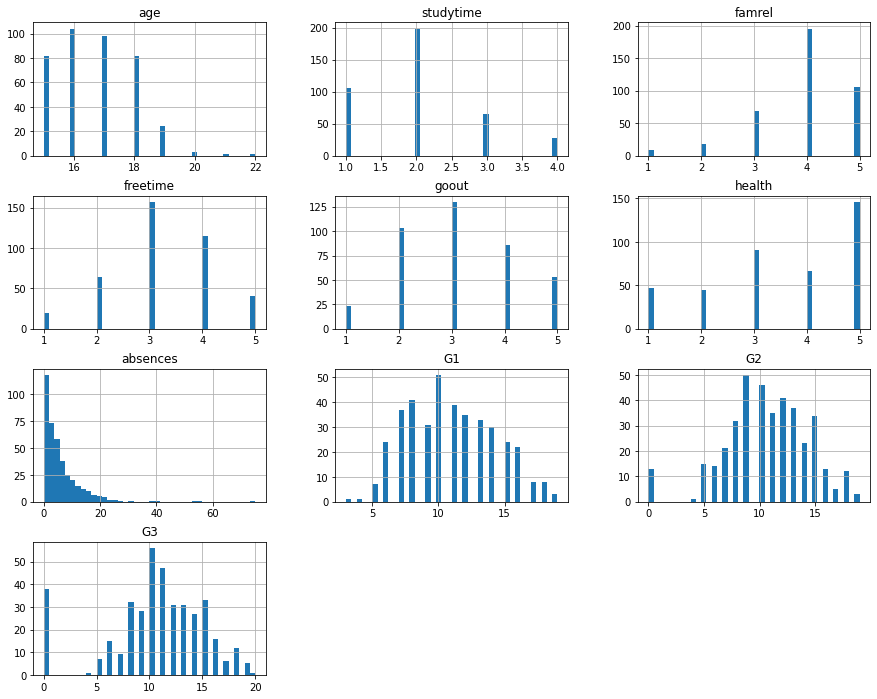

In [ ]:
df.hist(bins=40, figsize=(15,12))
plt.show()

Looking at the histograms it seems weird that their are so many zeroes for grades we could just write them off as being outliers.

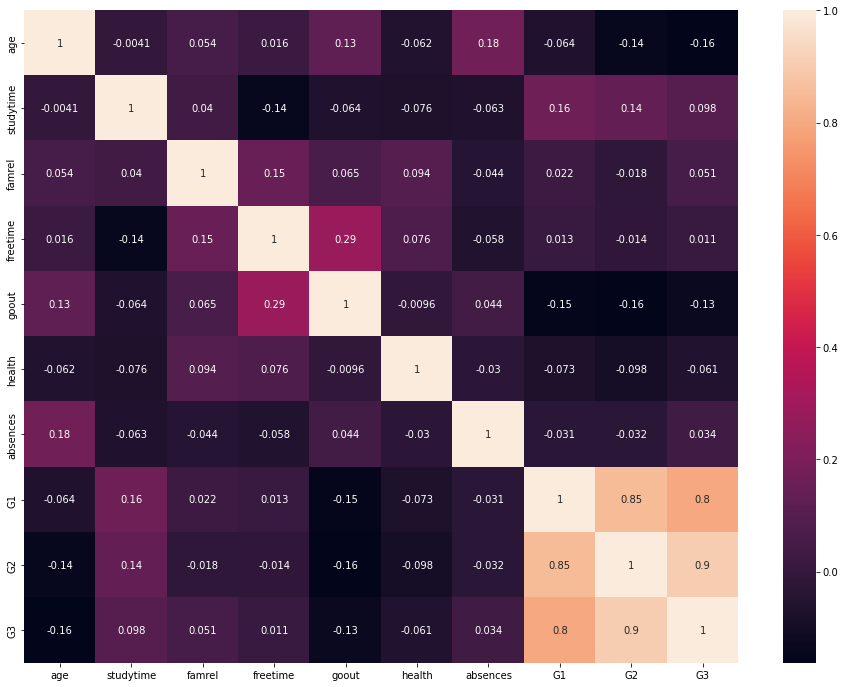

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Looking at the heat map there looks like there is a very strong correlation between their first and second grade and their final grades.Surprisingly study time did not have a strong correlation with grades as expected.

In [ ]:
corrMatrix["G3"].sort_values(ascending=False)

G3           1.000000
G2           0.904868
G1           0.801468
studytime    0.097820
famrel       0.051363
absences     0.034247
freetime     0.011307
health      -0.061335
goout       -0.132791
age         -0.161579
Name: G3, dtype: float64

In [ ]:
!pip install pandas_profiling --upgrade

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Looking at the interaction chart on the report we can see how strong of a linear relationship the first two grades have with the final grade. It would be save to assume that you could predict someones grade from their first two grades. Also you can see a better image of what abseses do to their grades. Kids who had less absences had a higher range for their grades while kids with alot of absences stayed around the same.

In [ ]:
#drop the categorical data so i can do a regressipon
df_SI = df.copy()

df_SI.drop(['sex', 'Mjob','Fjob','famsize','Pstatus','guardian','schoolsup','famsup','activities','internet','romantic'], axis = 1, inplace= True)



In [ ]:
#scaling the data so it can be compared better
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(df_SI)

df_scaled = pd.DataFrame(x_scaled)
df_scaled.columns = ['age',	'studytime', 'famrel',	'freetime',	'goout',	'health', 'absences', 'G1', 'G2', 'G3']

df_scaled.head()

,age,studytime,famrel,freetime,goout,health,absences,G1,G2,G3
0,0.428571,0.333333,0.75,0.50,0.75,0.5,0.080000,0.1250,0.315789,0.30
1,0.285714,0.333333,1.00,0.50,0.50,0.5,0.053333,0.1250,0.263158,0.30
2,0.000000,0.333333,0.75,0.50,0.25,0.5,0.133333,0.2500,0.421053,0.50
3,0.000000,0.666667,0.50,0.25,0.25,1.0,0.026667,0.7500,0.736842,0.75
4,0.142857,0.333333,0.75,0.50,0.25,1.0,0.053333,0.1875,0.526316,0.50


In [ ]:
from sklearn.linear_model import LinearRegression

y = df_scaled['G3'].copy()
X = df_scaled.drop(['G3'], axis = 1)

lin_reg = LinearRegression().fit(X,y)
r_sq_Linear = lin_reg.score(X, y)

print("Linear model assessment: ", r_sq_Linear)

Linear model assessment:  0.8348922849762903


In [ ]:
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1483.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):                   3.30e-293
Time:                        08:27:06   Log-Likelihood:                          367.83
No. Observations:                 395   AIC:                                     -717.7
Df Residuals:                     386   BIC:                                     -681.9
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Conclusion
Seeing that G1 and G2 have strong positive relationship it can be assumed that you can predict how well someone will do by looking at their previous grades. We assumed study time would play a big role in how well you do. This might be because 50% of the kids had studied for 2-5 hours. A reason it could be not be helping is because they are over studying. There is a lot of research that say that studying long hours has the opposite affect. Although in this case it had no negative correlation. As for absense by looking at the charts you can see kids you had tons of absense their grades stayed at around 12-10 which is like a D or outright failing. Meanwhile kids you went to class while not all had A's and B's there certainly where more in that area. So coming to class might not necessarily mean better grades it will surely increase that chance of it.